In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

In [157]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [27]:
#Import all libraries

In [28]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv')

In [29]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [30]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [31]:
# here is no missing value in data as per above query

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [33]:
# Quality-label column is int and rest of all feature column are in float data type there is no object data type column

In [34]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [35]:
# here Mean and 50% Rows seems almost same
#residual sugar , Fress sulfure dox and total sulfur dox these columns shows outliers in 75% and max value

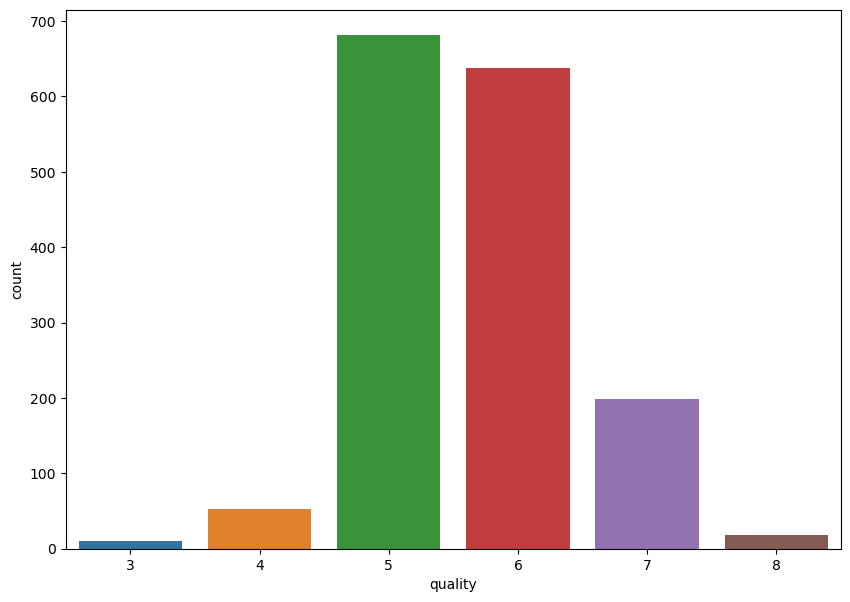

In [36]:
plt.figure(figsize=(10,7))
sns.countplot(x='quality',data=df)
plt.show()

In [37]:
# wine quality 5 6 is very high some arround 7 also it seems imbalance data

In [38]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [39]:
# there is skewness in many columns which +0.5 to -0.5 ratio column

In [44]:
labels=df['quality']
features=df.drop('quality', axis=1)

In [45]:
labels

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [46]:
features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


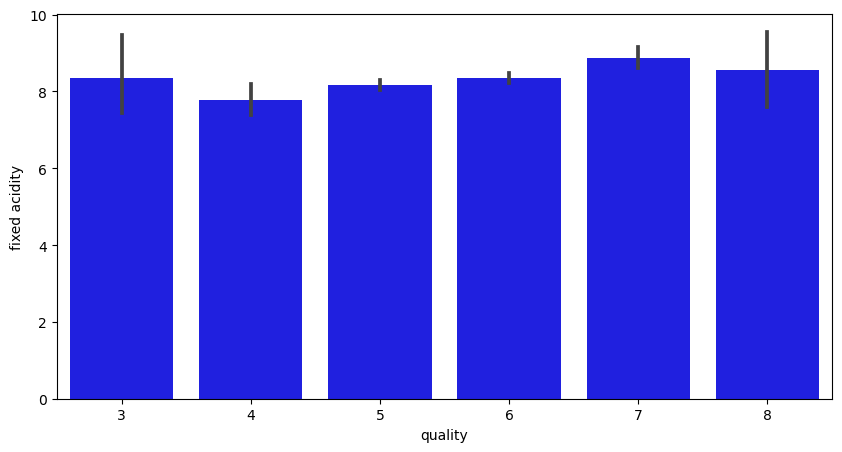

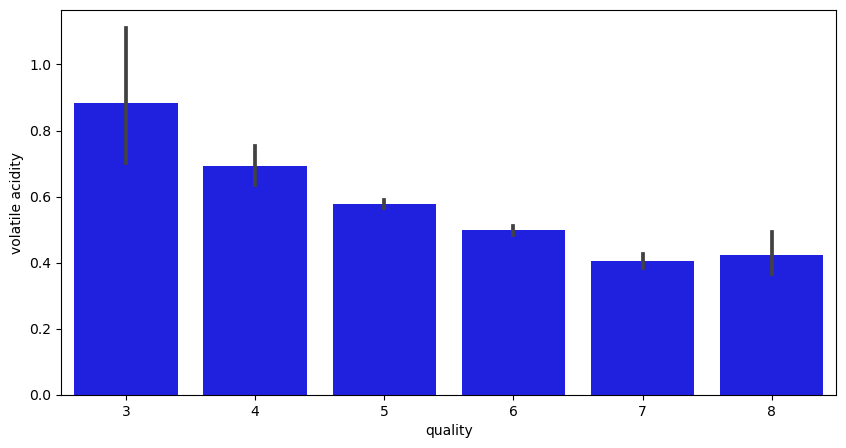

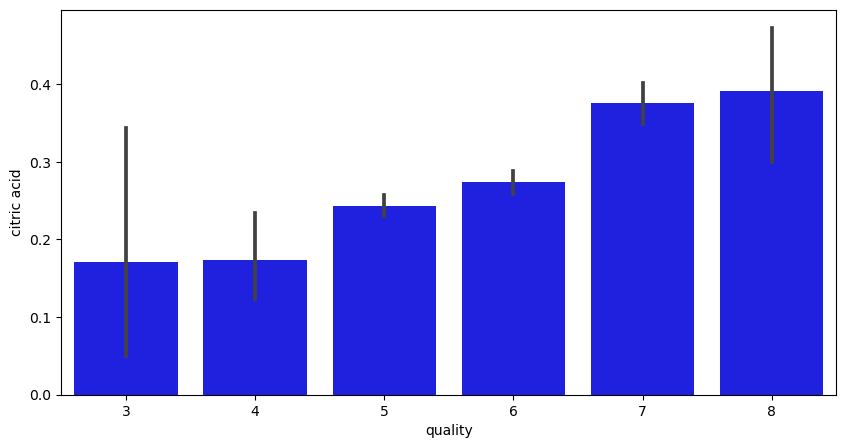

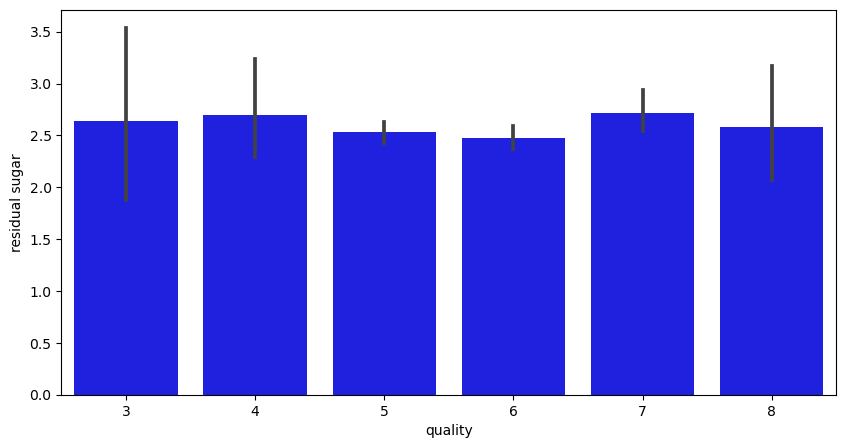

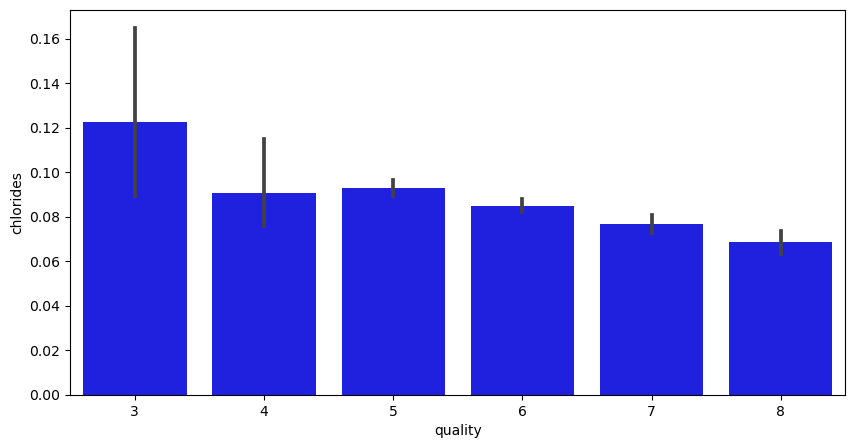

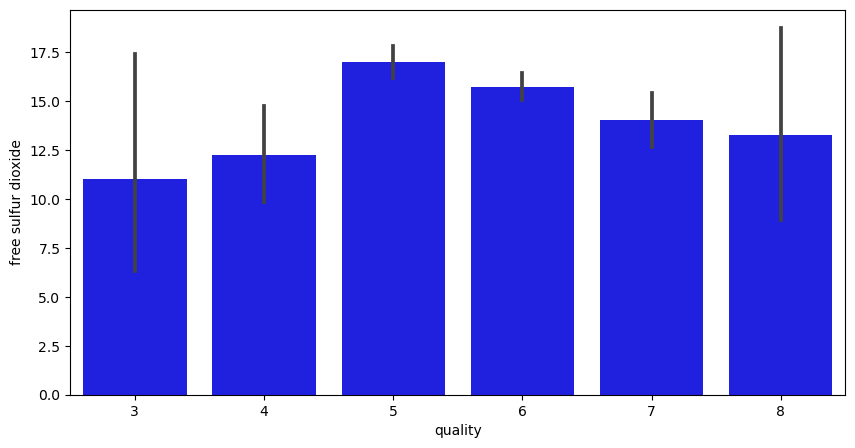

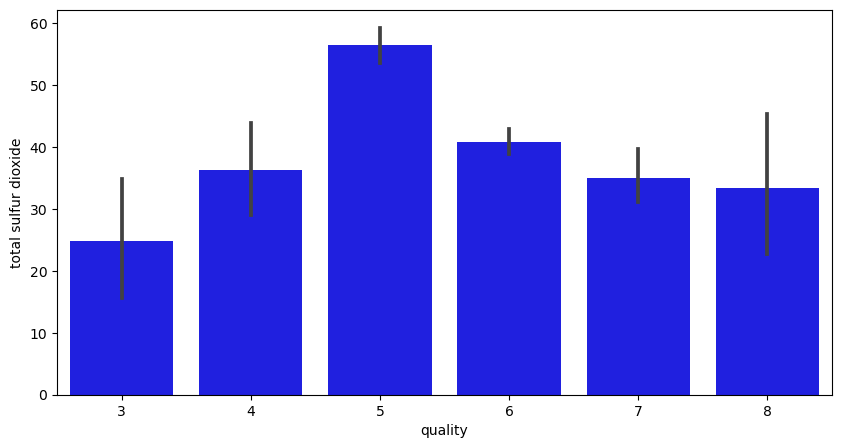

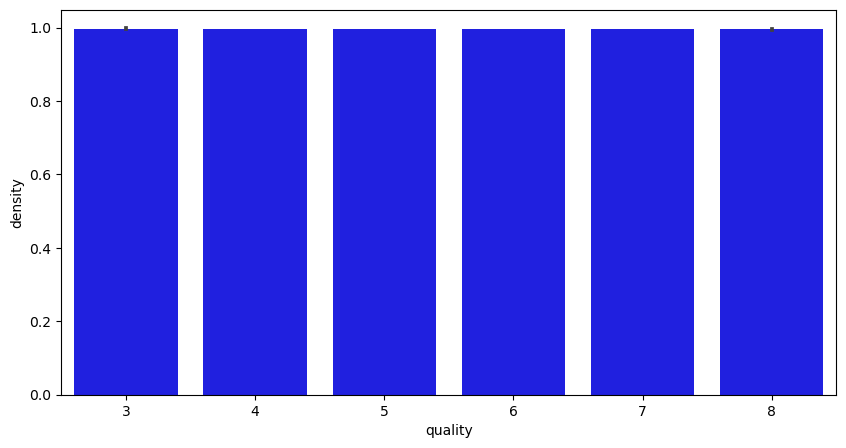

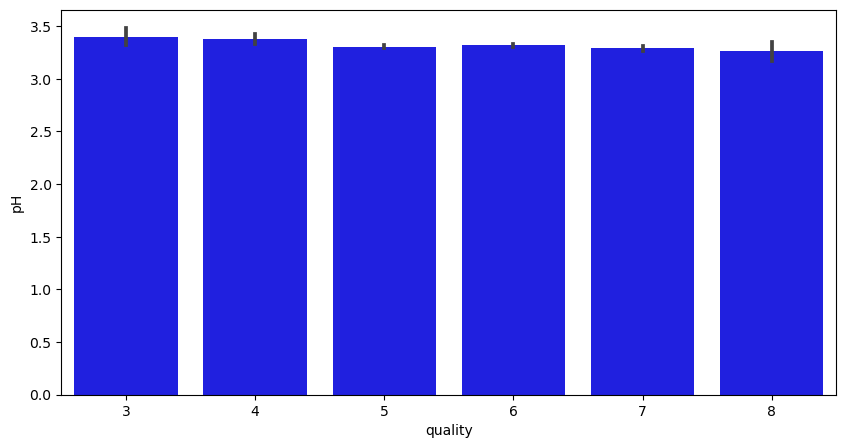

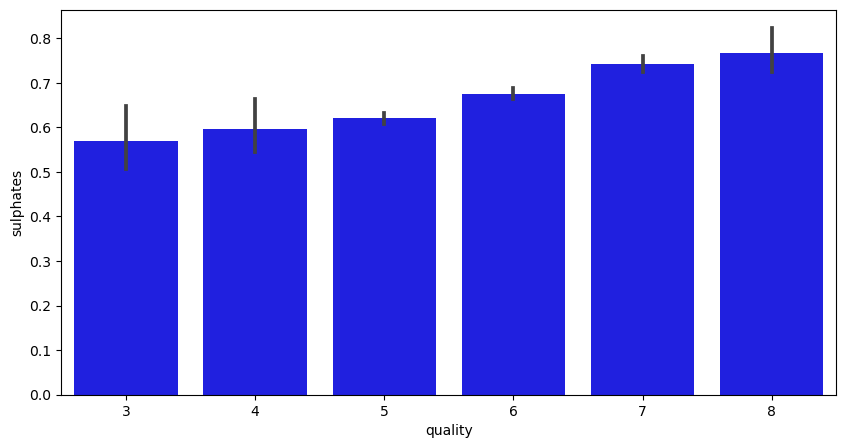

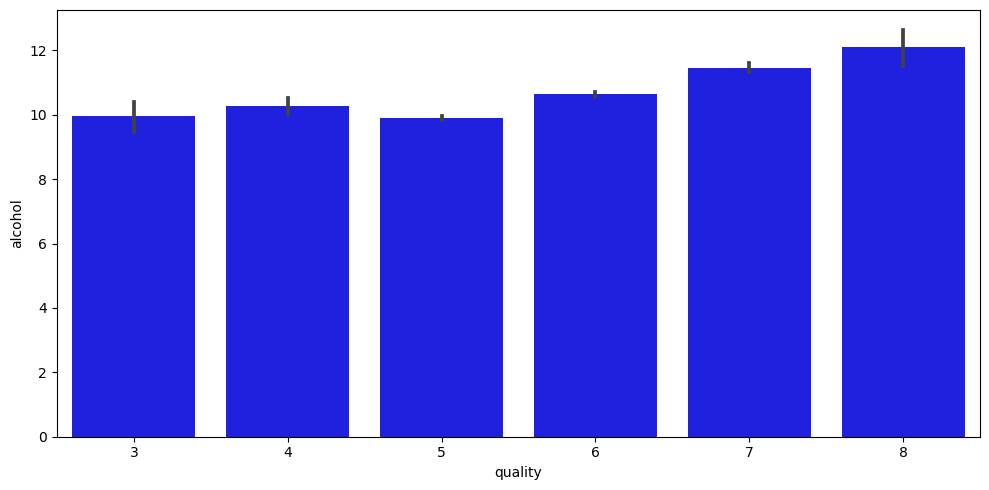

In [49]:
index=0
for column in features.items():
    plt.figure(figsize=(10,5))
    sns.barplot(x=labels,y=column[index],data=df,color="blue")
plt.tight_layout()
plt.show()

In [ ]:
#volatile acidity, chlorides goes to downward direction if quality increse
#in same line citric acid sulphates and acholoe is incresing trend goes upward directtion if quality gest incresse

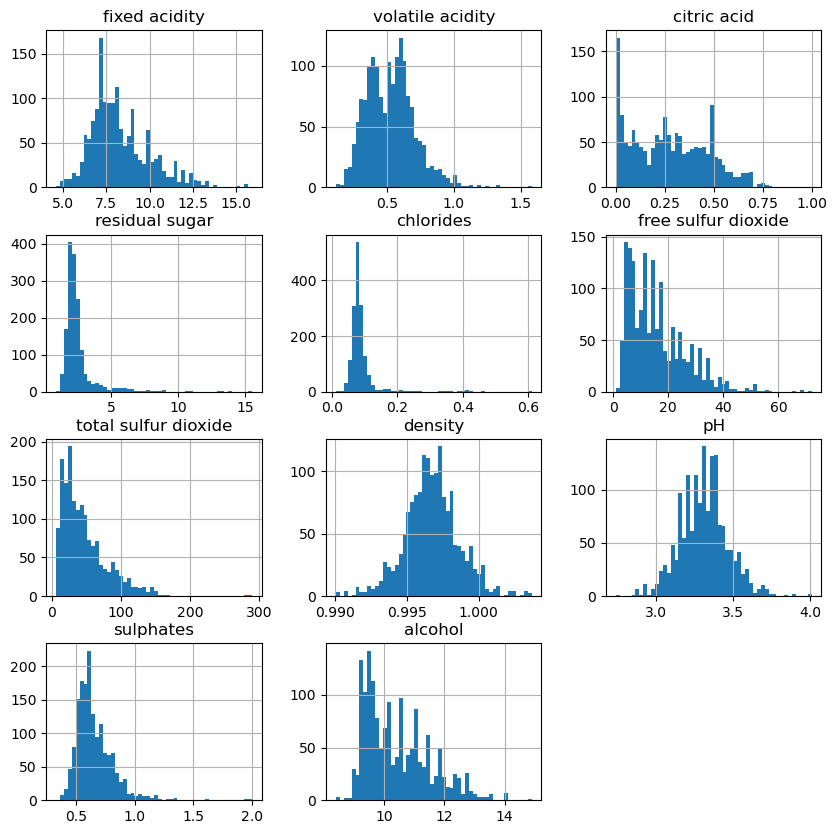

In [50]:
features.hist(figsize=(10,10), bins=50)
plt.show()

In [ ]:
# skewness is most of features like citric acid ,residual sugar,chloride,freesulfur dox,total sulfur dox, sulphate,alcohol

<Axes: >

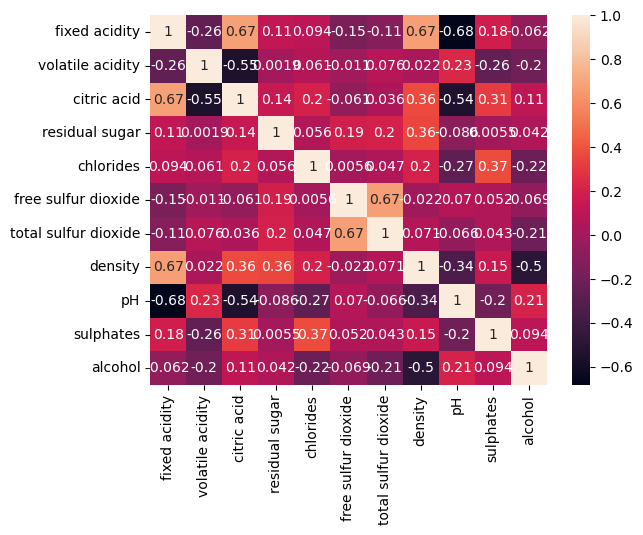

In [51]:
corr=features.corr()
sns.heatmap(corr,annot=True)

In [52]:
#here multiple columns shows +ve corelation  like fixed acity ,citricacid etc and -ve corelation with PH Fixed acidity
#we are facing multicollinearity  

In [54]:
df=df.drop('free sulfur dioxide',axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


In [55]:
# 1 column remove

In [56]:
df.shape

(1599, 11)

In [57]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

df=df[(z<3).all(axis=1)]


In [58]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


In [59]:
#for removing outlier used Z score 
# 1599-1464 = 135 rows are rmoved after using it

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1464 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1464 non-null   float64
 1   volatile acidity      1464 non-null   float64
 2   citric acid           1464 non-null   float64
 3   residual sugar        1464 non-null   float64
 4   chlorides             1464 non-null   float64
 5   total sulfur dioxide  1464 non-null   float64
 6   density               1464 non-null   float64
 7   pH                    1464 non-null   float64
 8   sulphates             1464 non-null   float64
 9   alcohol               1464 non-null   float64
 10  quality               1464 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 137.2 KB


In [73]:
X=df.drop('quality' , axis=1)
Y=df['quality']

In [74]:
Y.value_counts()

5    624
6    590
7    187
4     47
8     16
Name: quality, dtype: int64

In [ ]:
# as per above query we get it is imbalance class so we can use oversampling method

In [75]:
oversmaple=SMOTE()
X,Y= oversmaple.fit_resample(X,Y)


In [76]:
Y.value_counts()

5    624
6    624
7    624
4    624
8    624
Name: quality, dtype: int64

In [77]:
# after using SMOTE all categories in tgt label have the same value

In [79]:
Y=Y.apply(lambda y_value :1 if y_value>7 else 0)
Y

0       0
1       0
2       0
3       0
4       0
       ..
3115    1
3116    1
3117    1
3118    1
3119    1
Name: quality, Length: 3120, dtype: int64

In [ ]:
we tagged our target lable in 2parts 0 & 1 

In [80]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...
3115,12.446165,0.311479,0.707575,2.188167,0.072059,28.852081,0.998567,2.890650,0.816450,9.847334
3116,10.486054,0.364518,0.515482,2.592359,0.070458,16.076409,0.996829,3.153820,0.655349,11.160460
3117,8.448579,0.475999,0.413144,2.179996,0.073714,16.542851,0.993388,3.204571,0.706286,12.825711
3118,8.672814,0.417573,0.394854,1.827738,0.068069,12.138692,0.995231,3.343065,0.688613,11.675729


In [ ]:
# now we can use scaler technique to avoid bias output

In [83]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [84]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.664812,1.031234,-1.502969,-0.643985,-0.149659,-0.093609,0.807034,1.479196,-0.811804,-1.248815
1,-0.417579,2.038811,-1.502969,0.121990,1.057872,1.174701,0.202083,-0.748264,0.085146,-0.892160
2,-0.417579,1.367093,-1.300397,-0.206285,0.728546,0.675064,0.323073,-0.317143,-0.139091,-0.892160
3,1.683901,-1.319779,1.333038,-0.643985,-0.204546,0.905666,0.928024,-1.035678,-0.662312,-0.892160
4,-0.664812,1.031234,-1.502969,-0.643985,-0.149659,-0.093609,0.807034,1.479196,-0.811804,-1.248815
...,...,...,...,...,...,...,...,...,...,...
3115,2.454133,-1.143569,2.080401,-0.328659,-0.365962,-0.291462,1.270775,-2.971052,1.105053,-0.849956
3116,1.242623,-0.846678,1.107587,0.113629,-0.453822,-0.782477,0.219878,-1.080080,-0.099112,0.320876
3117,-0.016704,-0.222644,0.589315,-0.337600,-0.275118,-0.764550,-1.862172,-0.715416,0.281620,1.805675
3118,0.121891,-0.549694,0.496691,-0.723058,-0.584955,-0.933818,-0.747245,0.279711,0.149525,0.780309


In [85]:
# all are in Float value , there is changes of biasness , after using this method data will be standardized

In [ ]:
# now train and test data 

In [147]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size=0.2, random_state=21)

In [148]:
def classify (model,X,Y):
    X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size=0.2, random_state=21)
   
    model.fit(X_train,Y_train)
    
    Pred=model.predict(X_test)

    acc_score=(accuracy_score(Y_test,Pred)*100)
    print("Accuracy score :", acc_score)

    Class_report= classification_report(Y_test,Pred)
    print ("classification report is:",Class_report)

    cv_score=(cross_val_score(model,X,Y, cv=5).mean())*100
    print ("cross val score is:" , cv_score)

    result=acc_score-cv_score
    print(" final score is:",result)


In [128]:
# I defined the class for any ML model that call fun. that will running with train test split, accuracy score, classification report


In [129]:
model=LogisticRegression()
classify(model,X,Y)

Accuracy score : 88.62179487179486
classification report is:               precision    recall  f1-score   support

           0       0.92      0.94      0.93       505
           1       0.71      0.67      0.69       119

    accuracy                           0.89       624
   macro avg       0.82      0.80      0.81       624
weighted avg       0.88      0.89      0.88       624

cross val score is: 86.08974358974358
 final score is: 2.5320512820512846


In [132]:
#Super vector classifier
model=SVC(C=1.0, kernel ='rbf', gamma ='auto', random_state=42)
classify(model,X,Y)

Accuracy score : 97.59615384615384
classification report is:               precision    recall  f1-score   support

           0       1.00      0.97      0.98       505
           1       0.89      0.99      0.94       119

    accuracy                           0.98       624
   macro avg       0.95      0.98      0.96       624
weighted avg       0.98      0.98      0.98       624

cross val score is: 95.73717948717949
 final score is: 1.8589743589743506


In [ ]:
# it is for metrics evaluation

In [137]:
model=DecisionTreeClassifier(random_state=15,max_depth=20)
classify(model,X,Y)

Accuracy score : 96.9551282051282
classification report is:               precision    recall  f1-score   support

           0       0.99      0.98      0.98       505
           1       0.90      0.94      0.92       119

    accuracy                           0.97       624
   macro avg       0.94      0.96      0.95       624
weighted avg       0.97      0.97      0.97       624

cross val score is: 95.67307692307693
 final score is: 1.2820512820512704


In [138]:
model=RandomForestClassifier(max_depth=20, random_state =111)
classify(model,X,Y)

Accuracy score : 98.71794871794873
classification report is:               precision    recall  f1-score   support

           0       0.99      1.00      0.99       505
           1       0.99      0.94      0.97       119

    accuracy                           0.99       624
   macro avg       0.99      0.97      0.98       624
weighted avg       0.99      0.99      0.99       624

cross val score is: 97.78846153846155
 final score is: 0.9294871794871824


In [140]:
model=ExtraTreesClassifier()
classify(model,X,Y)

Accuracy score : 99.51923076923077
classification report is:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       505
           1       0.99      0.98      0.99       119

    accuracy                           1.00       624
   macro avg       0.99      0.99      0.99       624
weighted avg       1.00      1.00      1.00       624

cross val score is: 99.03846153846153
 final score is: 0.4807692307692406


In [160]:
svc_param={'kernel':['poly','sigmoid','rbf'],
          'gamma': ['scale','auto'],
          'shrinking':[True,False],
          'random_state':[21,42,104],
          'probability': [True,False],
          'decision_function_shape': ['ovo','ovr'],
          'verbose': [True,False]}

In [161]:
GSCV=GridSearchCV(SVC(),svc_param, cv=5)
GSCV.fit(X_train,Y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'sigmoid', 'rbf'],
                         'probability': [True, False],
                         'random_state': [21, 42, 104],
                         'shrinking': [True, False], 'verbose': [True, False]})

In [162]:
GSCV.best_params_

{'decision_function_shape': 'ovo',
 'gamma': 'auto',
 'kernel': 'rbf',
 'probability': True,
 'random_state': 21,
 'shrinking': True,
 'verbose': True}

In [163]:
# it has been providing best parameter list out of all combination used in models

In [166]:
Final_Model=SVC(decision_function_shape='ovo',gamma='scale', kernel='rbf', probability=True,random_state=21, shrinking=True
               ,verbose=True)
Classifier=Final_Model.fit(X_train,Y_train)
fmod_pred=Final_Model.predict(X_test)
fmod_acc=(accuracy_score(Y_test,fmod_pred))*100
print("Accuracy score of best model is", fmod_acc)


[LibSVM]Accuracy score of best model is 97.59615384615384


In [175]:
!pip install --upgrade scikit-learn


In [179]:
from sklearn import metrics
from sklearn.metrics import roc_curve,auc

In [192]:
disp= metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptile("ROC curve")
plt.show()

AttributeError: module 'sklearn.metrics' has no attribute 'plot_roc_curve'

In [191]:
fpr,tpr,_=roc_curve(X_test, Y_test)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr,tpr, color='deepblue',lw=2, label='ROC Curve(area={ :.2f })'.format(roc_auc))
plt.plot([0,1],[0,1],color='navy',lw=2, linestyle="--" )
plt.xlable('False +ve rate')
plt.ylable('True+ve rate')
plt.title("ROC curve")
plt.legend(loc="lower right")
plt.show()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\DELL\AppData\Local\Temp\ipykernel_9924\519614340.py", line 1, in <module>
    fpr,tpr,_=roc_curve(X_test, Y_test)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py", line 992, in roc_curve
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py", line 749, in _binary_clf_curve
    )
ValueError: continuous-multioutput format is not supported

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1118, in structured_traceback
    return Fo

In [ ]:
# version issue Plot_roc_surve library 

In [ ]:
filename="Finale_Model_3.pkl"
joblib.dump(Final_Model, filename)

In [ ]:
#this way i saving classification model using job lib